# Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import os
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering 

# Load the dataset


In [2]:
data = pd.read_csv('CC GENERAL.csv')

In [3]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

# Exploratory Data Analysis


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data["CUST_ID"].nunique()

8950

In [6]:
data["BALANCE"].describe()

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: BALANCE, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BALANCE', ylabel='Count'>

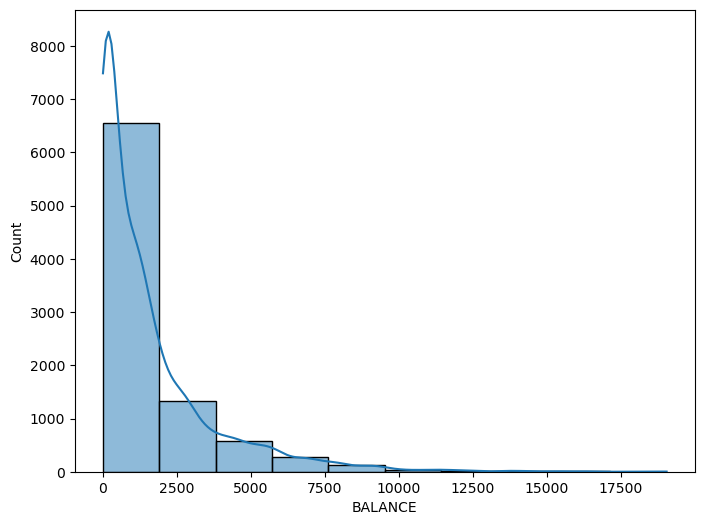

In [7]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["BALANCE"], bins=10, kde=True)

<Axes: ylabel='BALANCE'>

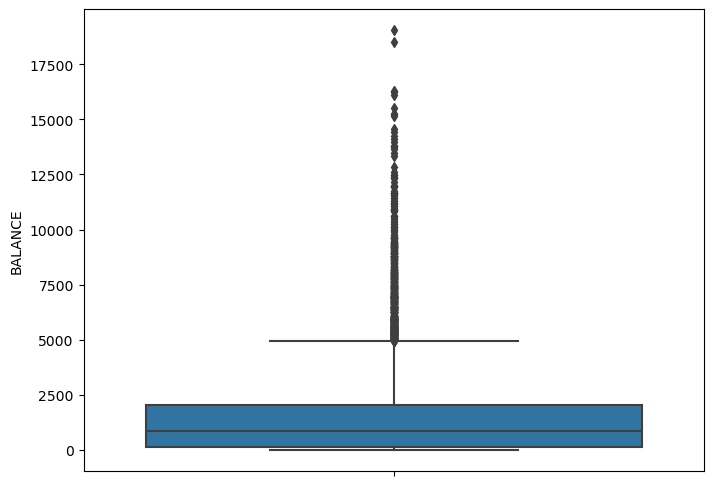

In [8]:
plt.figure(figsize = (8,6))
sns.boxplot(y = data["BALANCE"])

In [9]:
data["BALANCE_FREQUENCY"].describe() ##La mayoria actualiza bastante su cuenta

count    8950.000000
mean        0.877271
std         0.236904
min         0.000000
25%         0.888889
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BALANCE_FREQUENCY', ylabel='Count'>

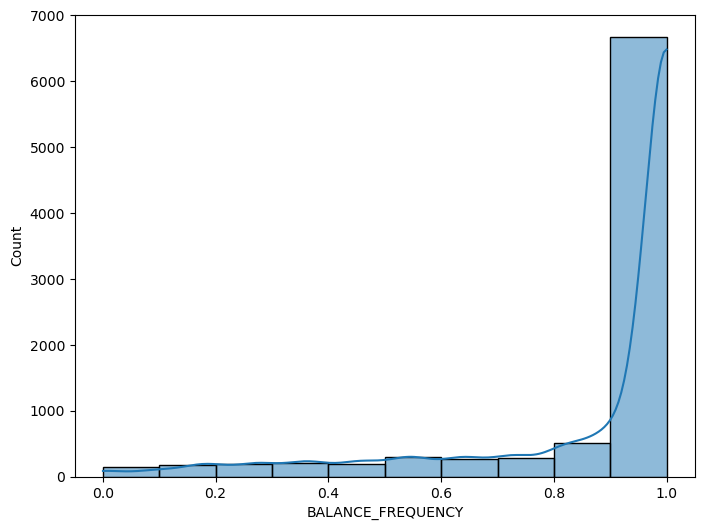

In [10]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["BALANCE_FREQUENCY"], bins=10, kde=True)

In [11]:
data["PURCHASES"].describe() ## 75% tiene mas de 1110 en compras
## 50% gastaron hasta 361 en compra

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
25%         39.635000
50%        361.280000
75%       1110.130000
max      49039.570000
Name: PURCHASES, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PURCHASES', ylabel='Count'>

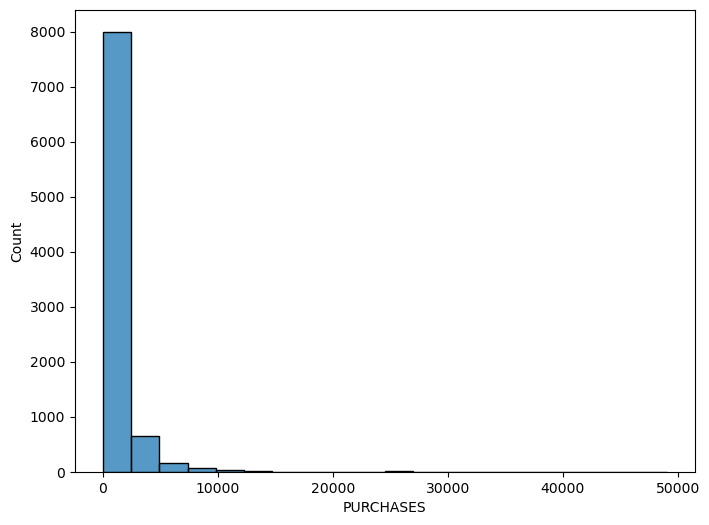

In [12]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["PURCHASES"], bins=20)

In [13]:
data["ONEOFF_PURCHASES"].describe() ## 25% no ha gastado nada(?)
####### Puede significar que prefieren pagar a plazo o usar tarjetas de credito

count     8950.000000
mean       592.437371
std       1659.887917
min          0.000000
25%          0.000000
50%         38.000000
75%        577.405000
max      40761.250000
Name: ONEOFF_PURCHASES, dtype: float64

In [14]:
data["INSTALLMENTS_PURCHASES"].describe()

count     8950.000000
mean       411.067645
std        904.338115
min          0.000000
25%          0.000000
50%         89.000000
75%        468.637500
max      22500.000000
Name: INSTALLMENTS_PURCHASES, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='INSTALLMENTS_PURCHASES', ylabel='Count'>

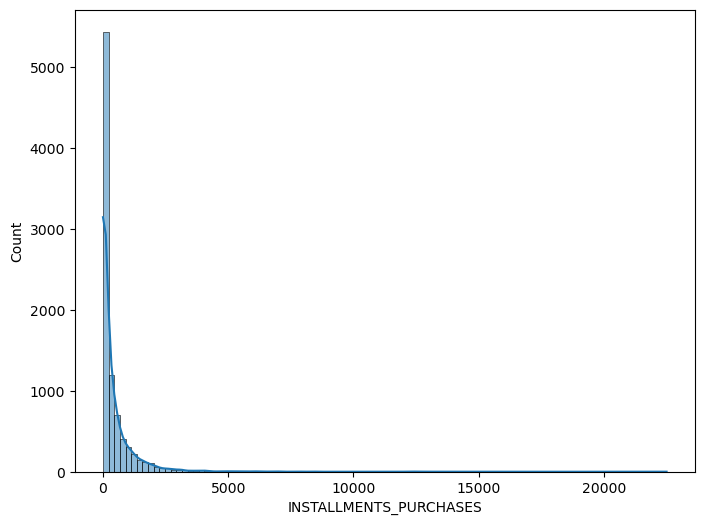

In [15]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["INSTALLMENTS_PURCHASES"], bins=100, kde=True)

In [16]:
data["CASH_ADVANCE"].value_counts()
##Con valores altos se puede considerar como clientes de riesgo

CASH_ADVANCE
0.000000       4628
495.425832        1
1486.243293       1
855.232779        1
3767.104707       1
               ... 
5187.029833       1
137.757459        1
124.941315        1
272.559361        1
127.040008        1
Name: count, Length: 4323, dtype: int64

In [17]:
data["CASH_ADVANCE"].describe()

count     8950.000000
mean       978.871112
std       2097.163877
min          0.000000
25%          0.000000
50%          0.000000
75%       1113.821139
max      47137.211760
Name: CASH_ADVANCE, dtype: float64

In [18]:
data["PURCHASES_FREQUENCY"].describe()

count    8950.000000
mean        0.490351
std         0.401371
min         0.000000
25%         0.083333
50%         0.500000
75%         0.916667
max         1.000000
Name: PURCHASES_FREQUENCY, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PURCHASES_FREQUENCY', ylabel='Count'>

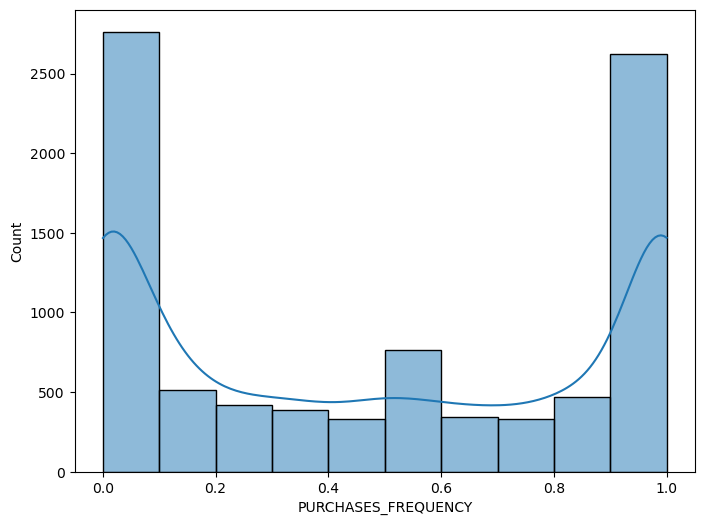

In [19]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["PURCHASES_FREQUENCY"], bins=10, kde=True)##Esta muy bien distribuido entre los que compran y los que no

In [20]:
data["ONEOFF_PURCHASES_FREQUENCY"].describe()## El 75% tiene una bajo uso del Oneoff method

count    8950.000000
mean        0.202458
std         0.298336
min         0.000000
25%         0.000000
50%         0.083333
75%         0.300000
max         1.000000
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ONEOFF_PURCHASES_FREQUENCY', ylabel='Count'>

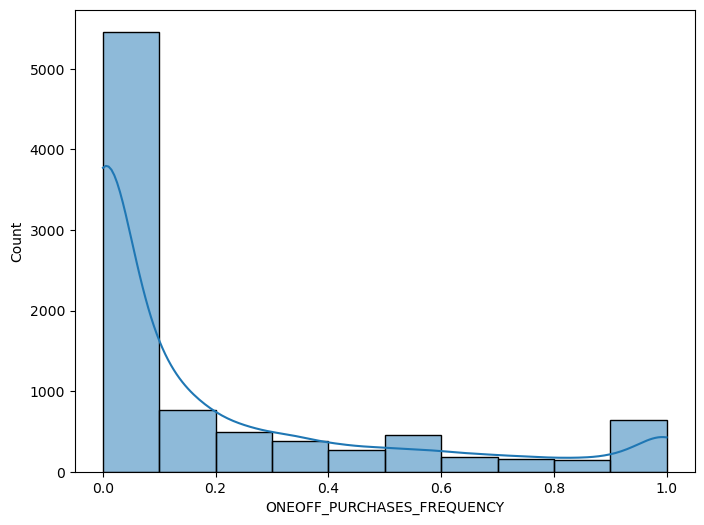

In [21]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["ONEOFF_PURCHASES_FREQUENCY"], bins=10, kde=True)

In [22]:
data["PURCHASES_INSTALLMENTS_FREQUENCY"].describe()

count    8950.000000
mean        0.364437
std         0.397448
min         0.000000
25%         0.000000
50%         0.166667
75%         0.750000
max         1.000000
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PURCHASES_INSTALLMENTS_FREQUENCY', ylabel='Count'>

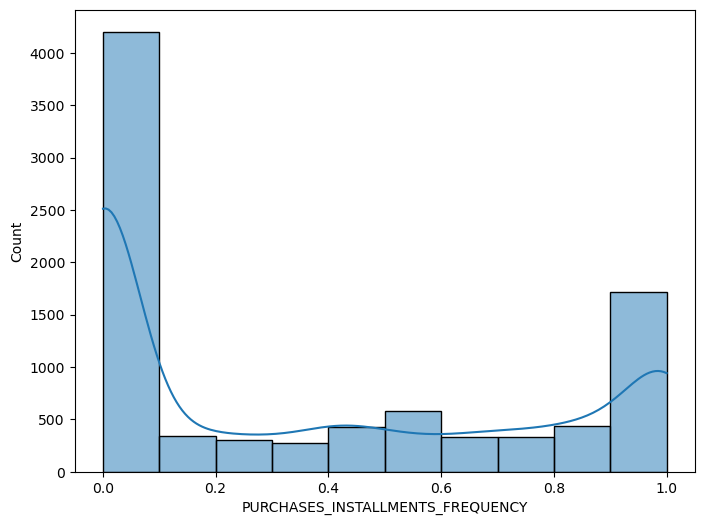

In [23]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["PURCHASES_INSTALLMENTS_FREQUENCY"], bins=10, kde=True)

In [24]:
data["CASH_ADVANCE_FREQUENCY"].describe() ## (?)1.5

count    8950.000000
mean        0.135144
std         0.200121
min         0.000000
25%         0.000000
50%         0.000000
75%         0.222222
max         1.500000
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

In [25]:
data[data["CASH_ADVANCE_FREQUENCY"]>1]## 8 valores con mayor a 1

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
681   C10708  5656.069801           1.000000     362.36            362.36   
1626  C11680  2876.009336           1.000000     152.61            152.61   
2555  C12629  5906.184924           1.000000     141.80            141.80   
2608  C12684  7801.511533           1.000000     231.40            231.40   
3038  C13127  3846.742530           1.000000       0.00              0.00   
3253  C13347  5709.486507           0.833333       0.00              0.00   
8055  C18273  1917.895730           1.000000     285.07            285.07   
8365  C18588  3857.562230           1.000000       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
681                      0.0   7240.433194             0.250000   
1626                     0.0   3719.650168             0.333333   
2555                     0.0   1651.286918             0.125000   
2608                     0.0   4109.465221             0.100000   
3038                     0.0   1932.460679             0.000000   
3253                     0.0   2794.326341             0.000000   
8055                     0.0   6084.858872             0.363636   
8365                     0.0   2127.213754             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
681                     0.250000                               0.0   
1626                    0.333333                               0.0   
2555                    0.125000                               0.0   
2608                    0.100000                               0.0   
3038                    0.000000                               0.0   
3253                    0.000000                               0.0   
8055                    0.363636                               0.0   
8365                    0.000000                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
681                 1.250000                12              2        8000.0   
1626                1.166667                24              2        4000.0   
2555                1.125000                12              2       10000.0   
2608                1.100000                20              3       13500.0   
3038                1.500000                18              0        5600.0   
3253                1.166667                10              0        6000.0   
8055                1.090909                28              6        3000.0   
8365                1.142857                26              0        5000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
681    683.421497       2036.877611               0.0       8  
1626   248.342971        584.926336               0.0       6  
2555   933.969974        919.289675               0.0       8  
2608  1593.617739       1522.496755               0.0      10  
3038   496.245836        538.346874               0.0       6  
3253   550.513331       1299.463370               0.0       6  
8055  5692.682993        556.449635               0.0      11  
8365   617.508991        538.396872               0.0       7

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CASH_ADVANCE_FREQUENCY', ylabel='Count'>

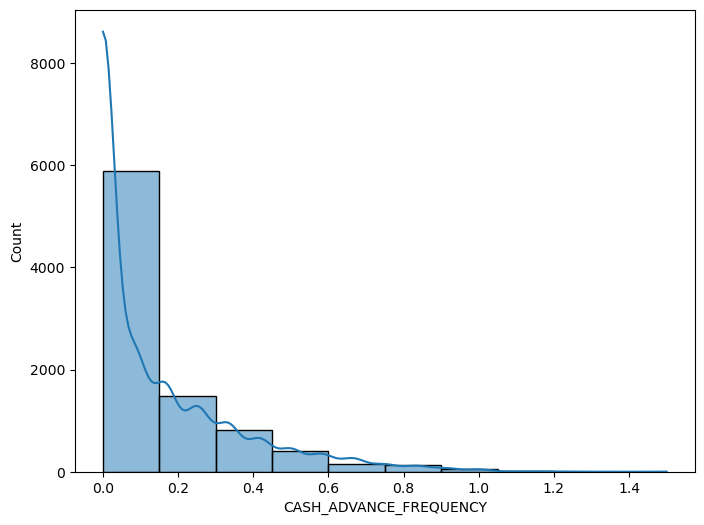

In [26]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["CASH_ADVANCE_FREQUENCY"], bins=10, kde=True)

<Axes: ylabel='CASH_ADVANCE_FREQUENCY'>

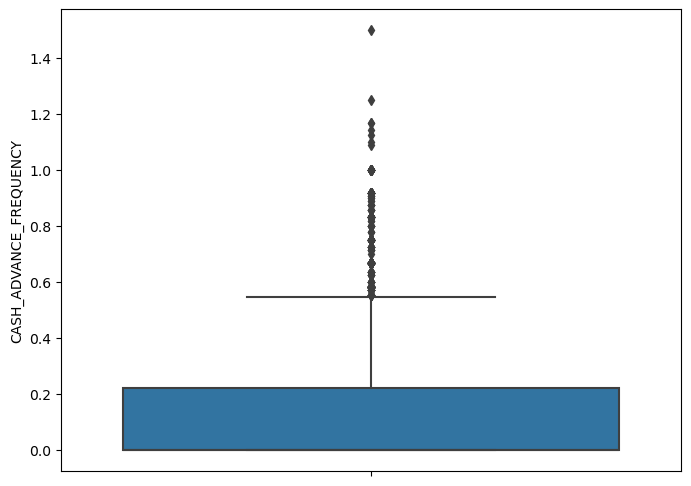

In [27]:
plt.figure(figsize = (8,6))
sns.boxplot(y = data["CASH_ADVANCE_FREQUENCY"])

In [28]:
data["CASH_ADVANCE_TRX"].describe()

count    8950.000000
mean        3.248827
std         6.824647
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       123.000000
Name: CASH_ADVANCE_TRX, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CASH_ADVANCE_TRX', ylabel='Count'>

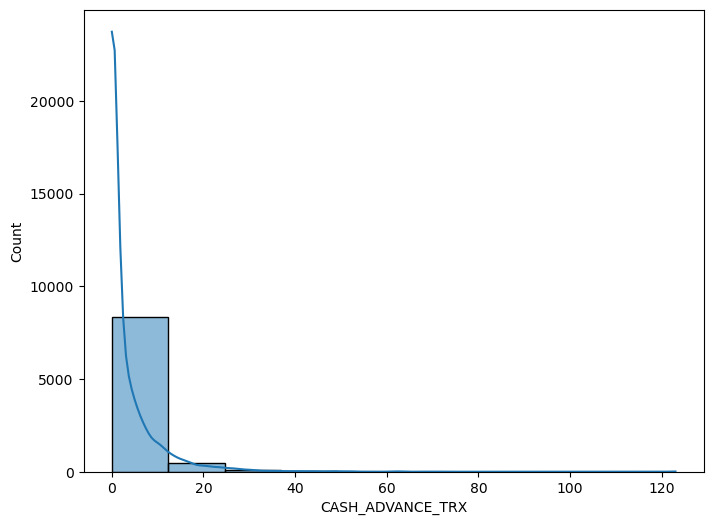

In [29]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["CASH_ADVANCE_TRX"], bins=10, kde=True)

In [30]:
data[data["CASH_ADVANCE_FREQUENCY"]>1]["CASH_ADVANCE_TRX"]#grandes cantidades de transacciones

681     12
1626    24
2555    12
2608    20
3038    18
3253    10
8055    28
8365    26
Name: CASH_ADVANCE_TRX, dtype: int64

In [31]:
data["PURCHASES_TRX"].describe()

count    8950.000000
mean       14.709832
std        24.857649
min         0.000000
25%         1.000000
50%         7.000000
75%        17.000000
max       358.000000
Name: PURCHASES_TRX, dtype: float64

In [32]:
data["CREDIT_LIMIT"].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CREDIT_LIMIT', ylabel='Count'>

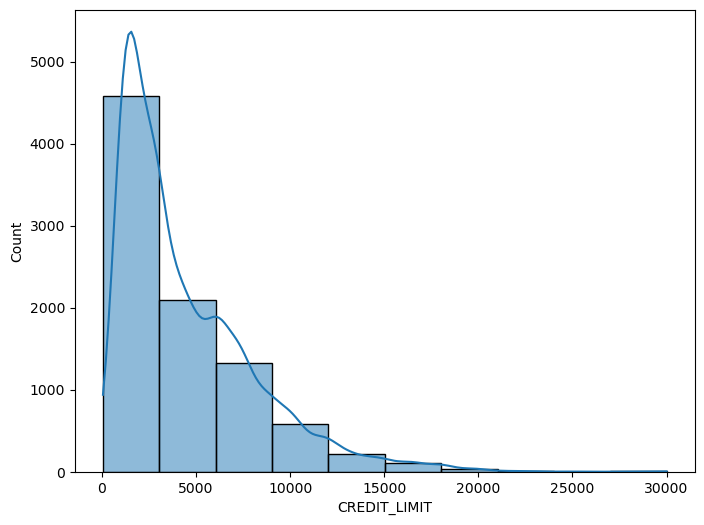

In [33]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["CREDIT_LIMIT"], bins=10, kde=True)

In [34]:
data["PAYMENTS"].describe()

count     8950.000000
mean      1733.143852
std       2895.063757
min          0.000000
25%        383.276166
50%        856.901546
75%       1901.134317
max      50721.483360
Name: PAYMENTS, dtype: float64

In [35]:
data["MINIMUM_PAYMENTS"].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [36]:
data["PRC_FULL_PAYMENT"].describe() ## 75% de los usuarios tienen un pago total de menor del 14%

count    8950.000000
mean        0.153715
std         0.292499
min         0.000000
25%         0.000000
50%         0.000000
75%         0.142857
max         1.000000
Name: PRC_FULL_PAYMENT, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PRC_FULL_PAYMENT', ylabel='Count'>

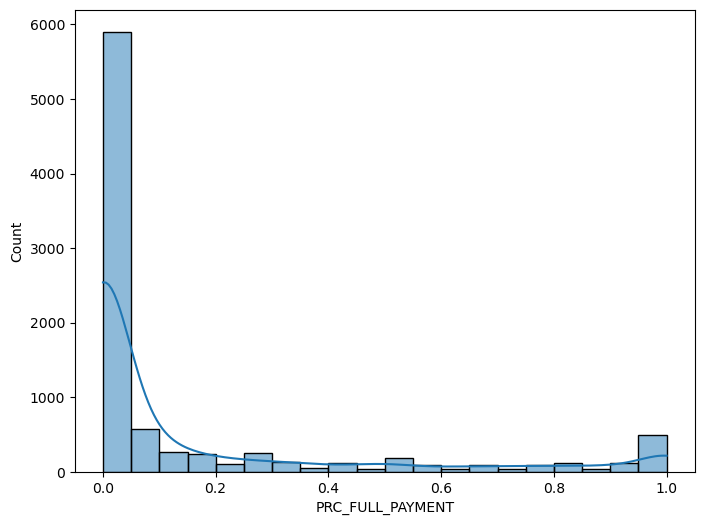

In [37]:
plt.figure(figsize=(8, 6)) 
sns.histplot(data["PRC_FULL_PAYMENT"], bins=20, kde=True)

In [38]:
data["TENURE"].describe()

count    8950.000000
mean       11.517318
std         1.338331
min         6.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: TENURE, dtype: float64

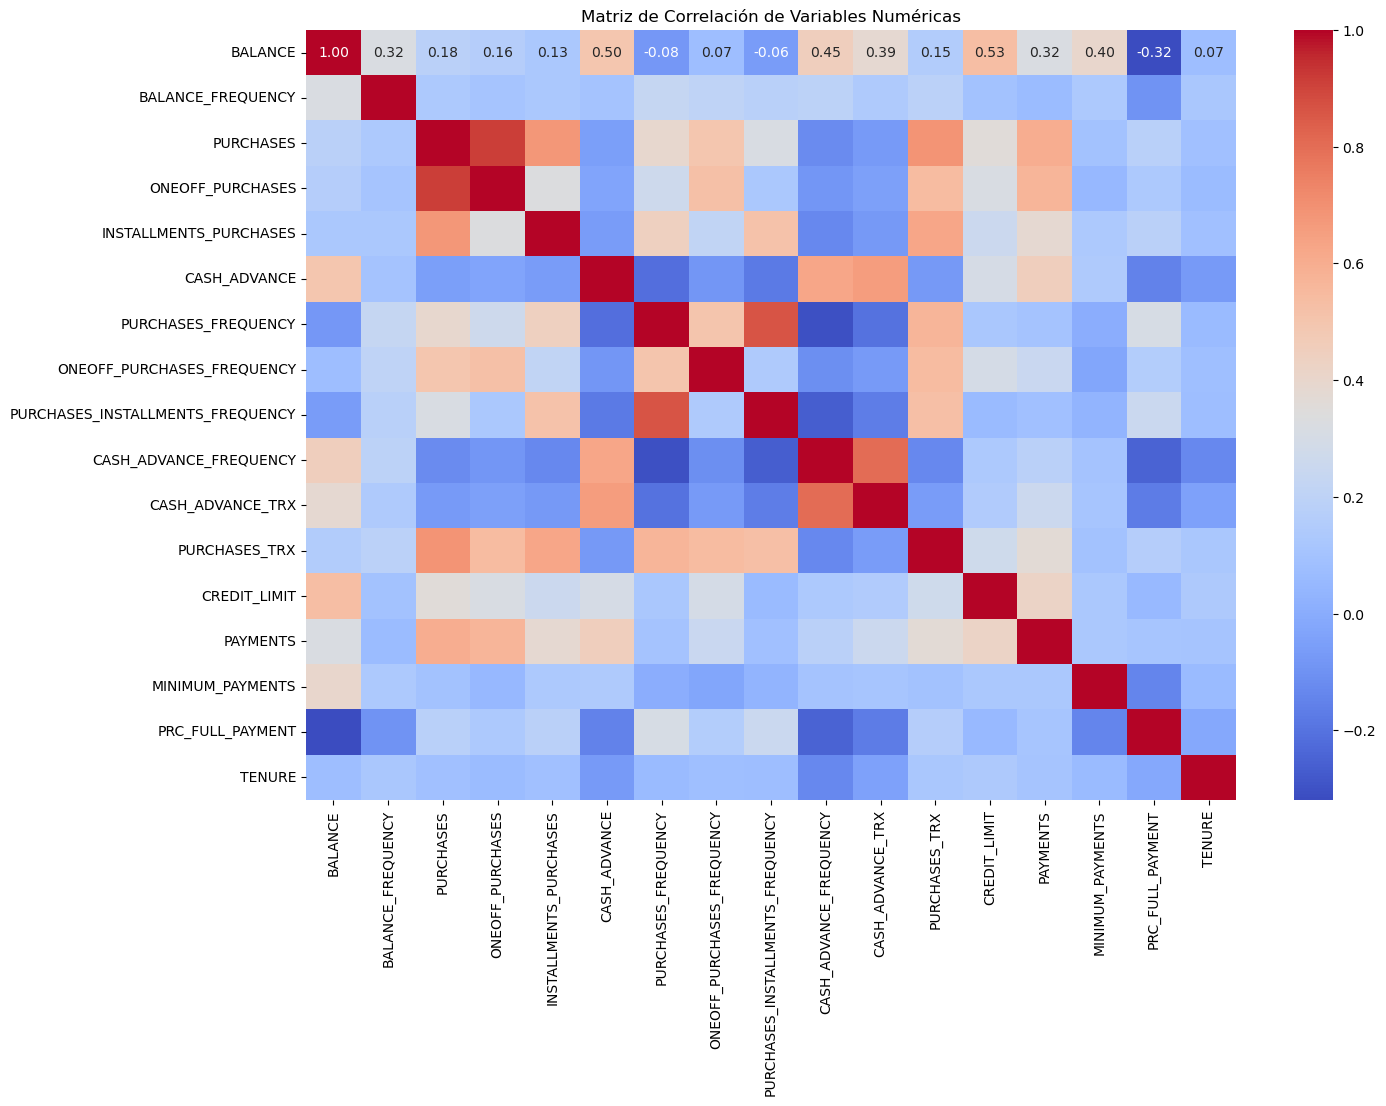

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

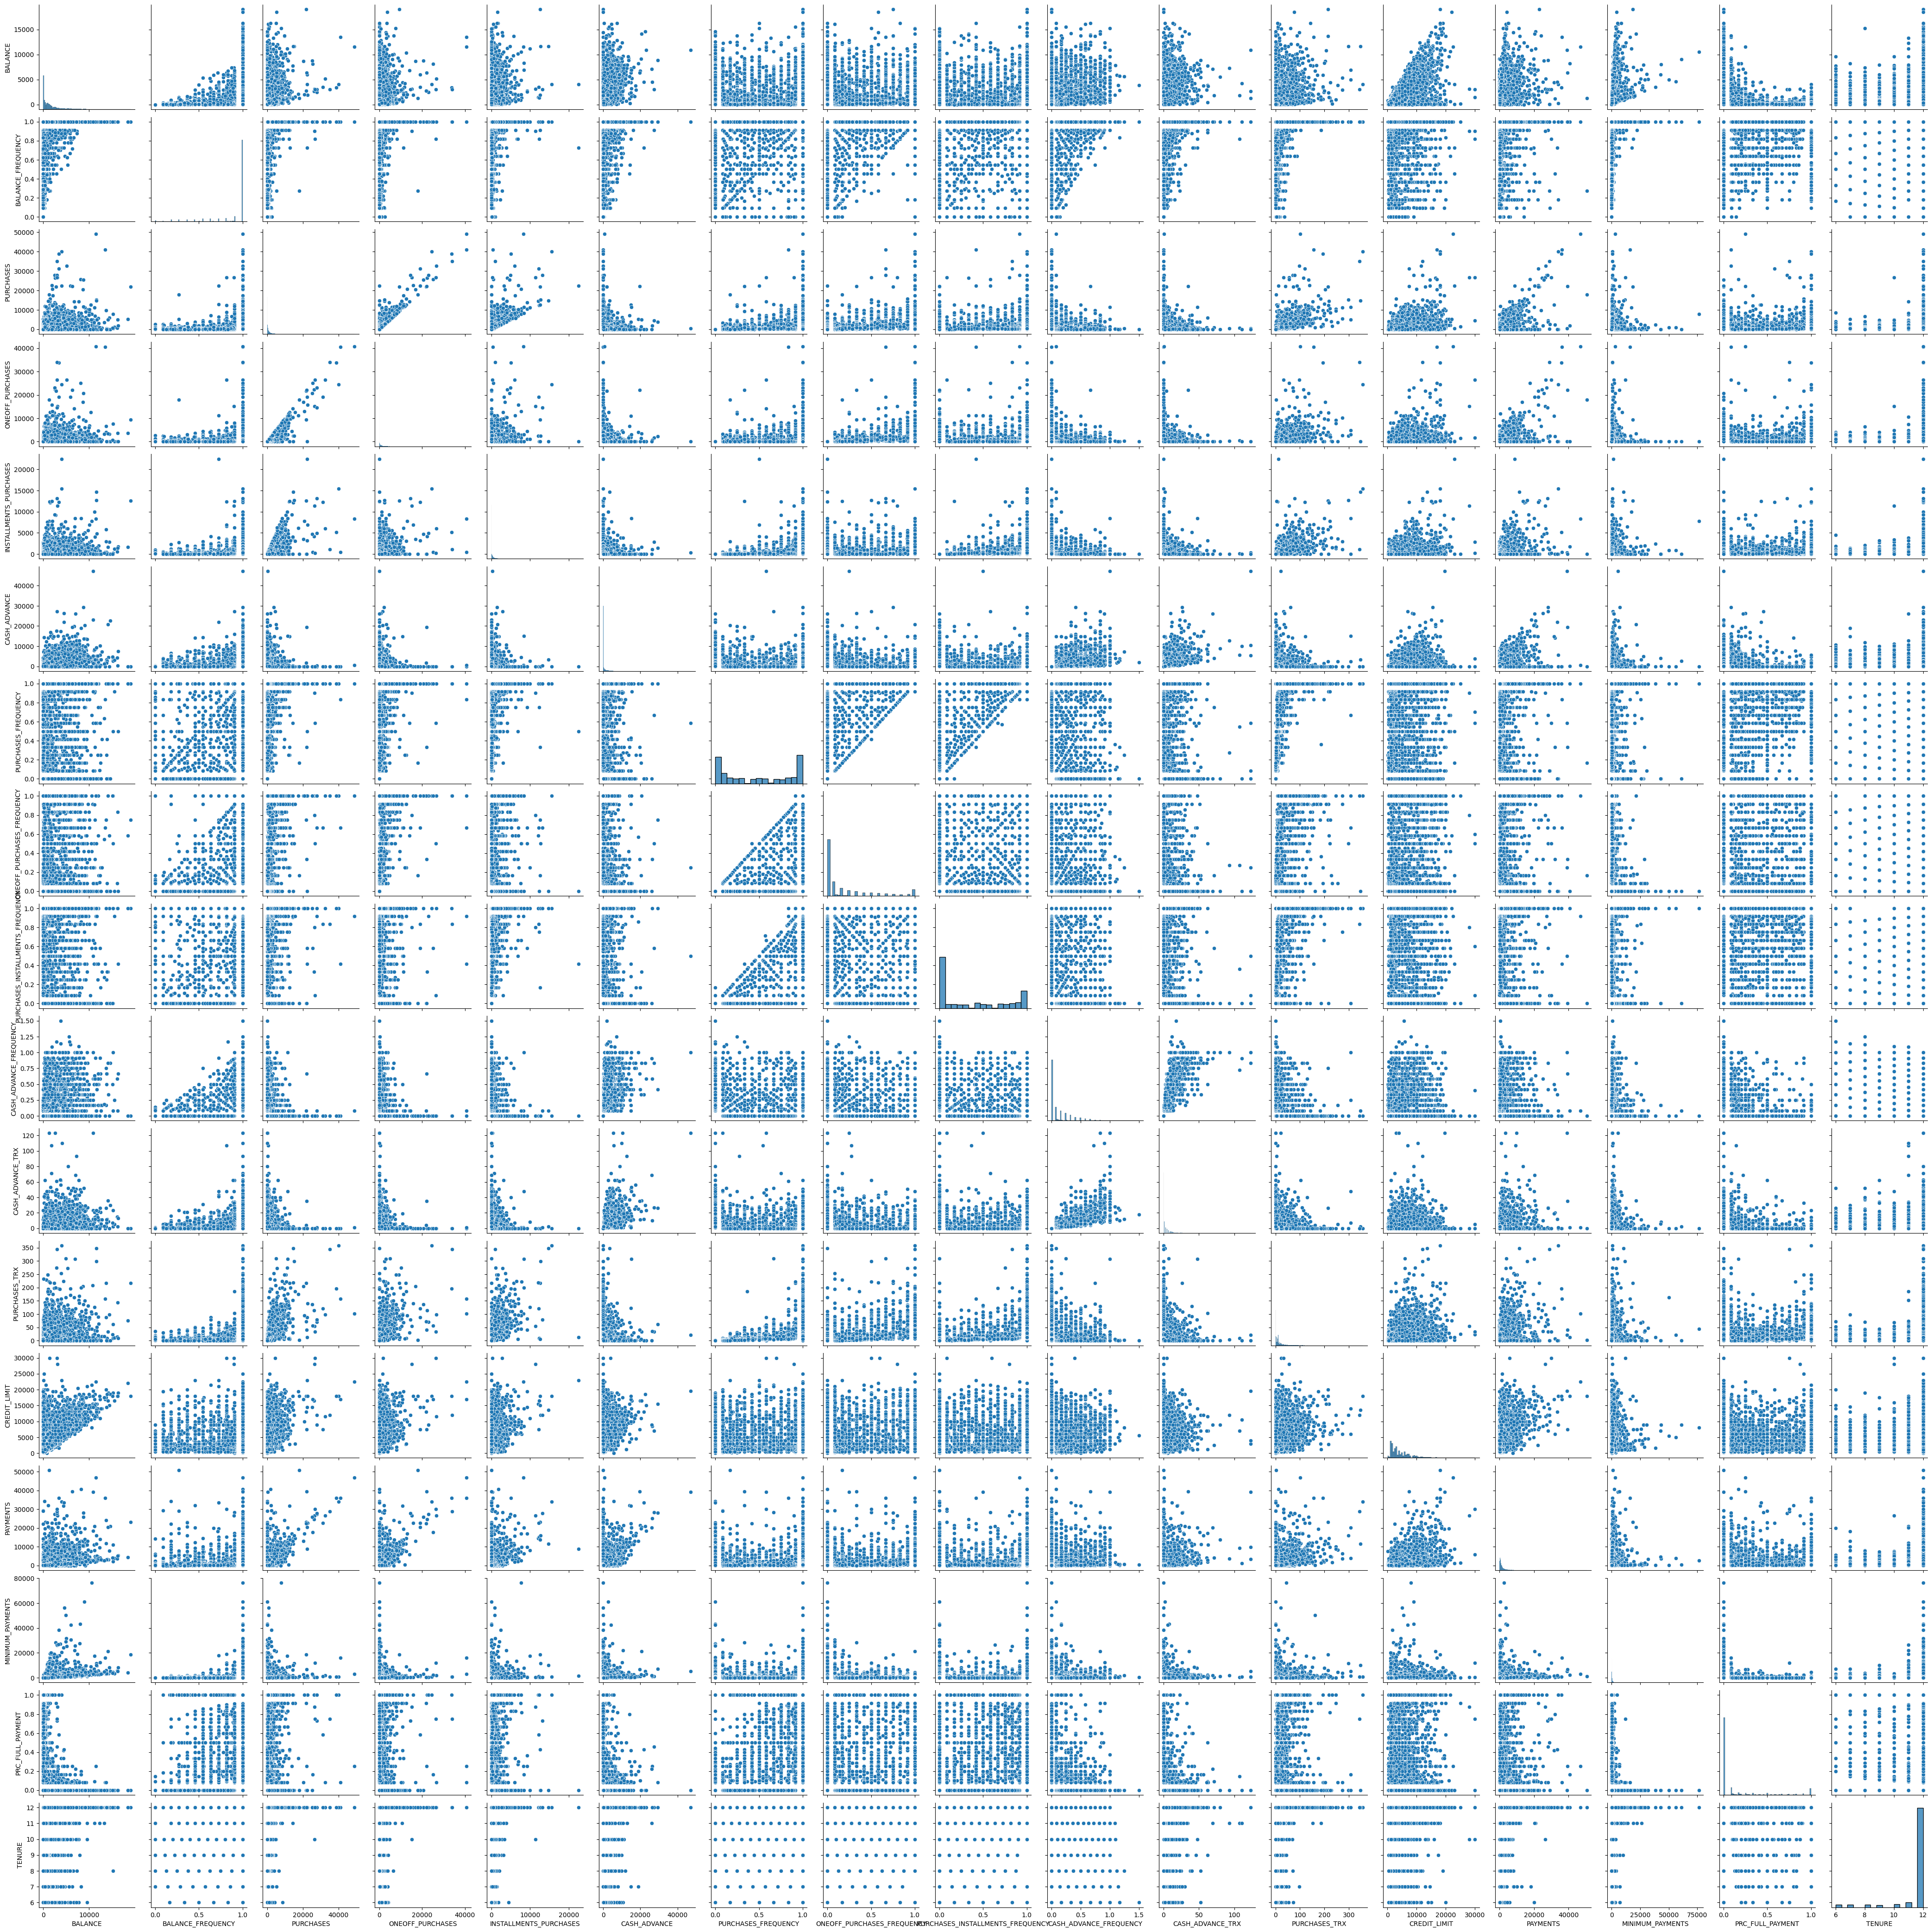

In [39]:
# Correlación de variables numéricas
# The original code passed the whole dataframe 'data' to the include parameter.
# This is incorrect and the reason for the error.
# Changing 'include=data' to 'include=np.number' to select only numerical columns for correlation.
correlation_matrix = data.select_dtypes(include=np.number).corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Gráfico de pares para variables numéricas
sns.pairplot(data.select_dtypes(include=np.number))
plt.show()

In [40]:
dataCor = data.drop("CUST_ID",axis=1)


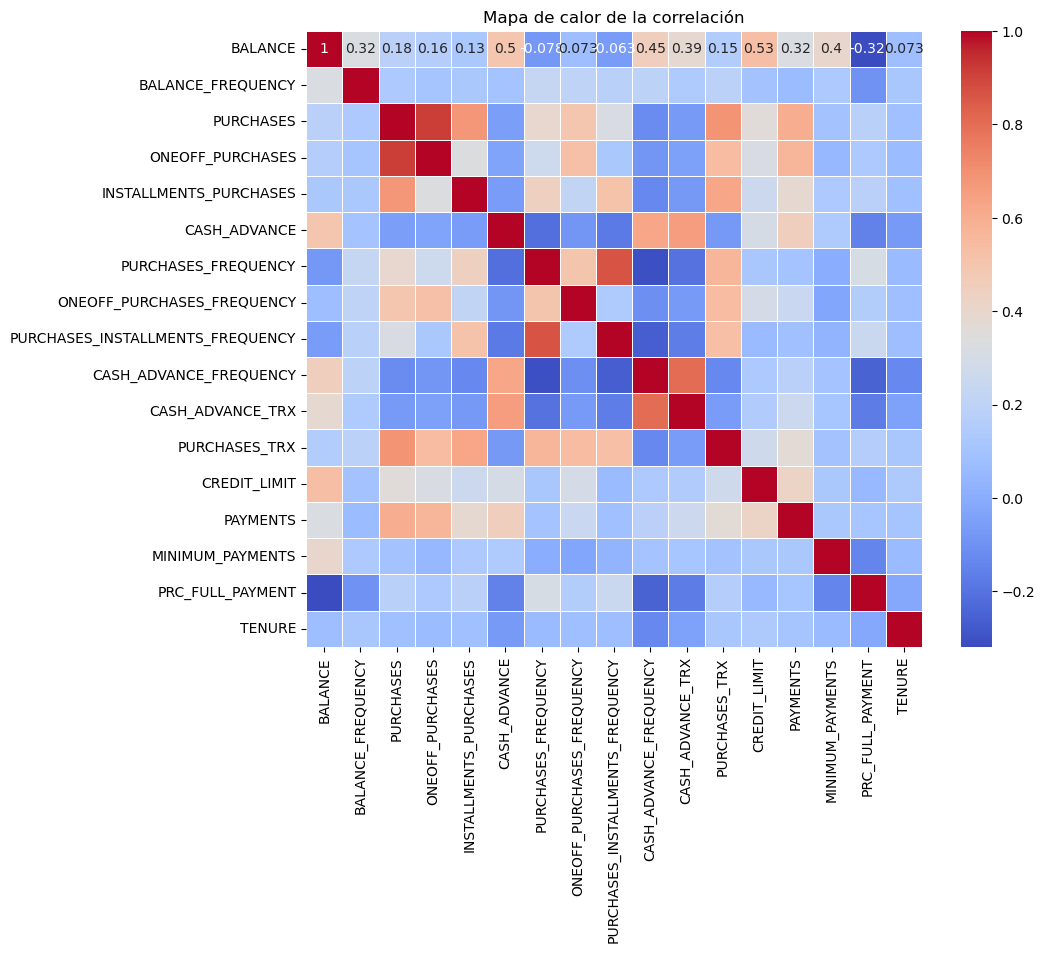

In [41]:
correlacion = dataCor.corr()

plt.figure(figsize=(10, 8))  # Tamaño del gráfico
sns.heatmap(correlacion, annot=True, cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Mapa de calor de la correlación")
plt.show()

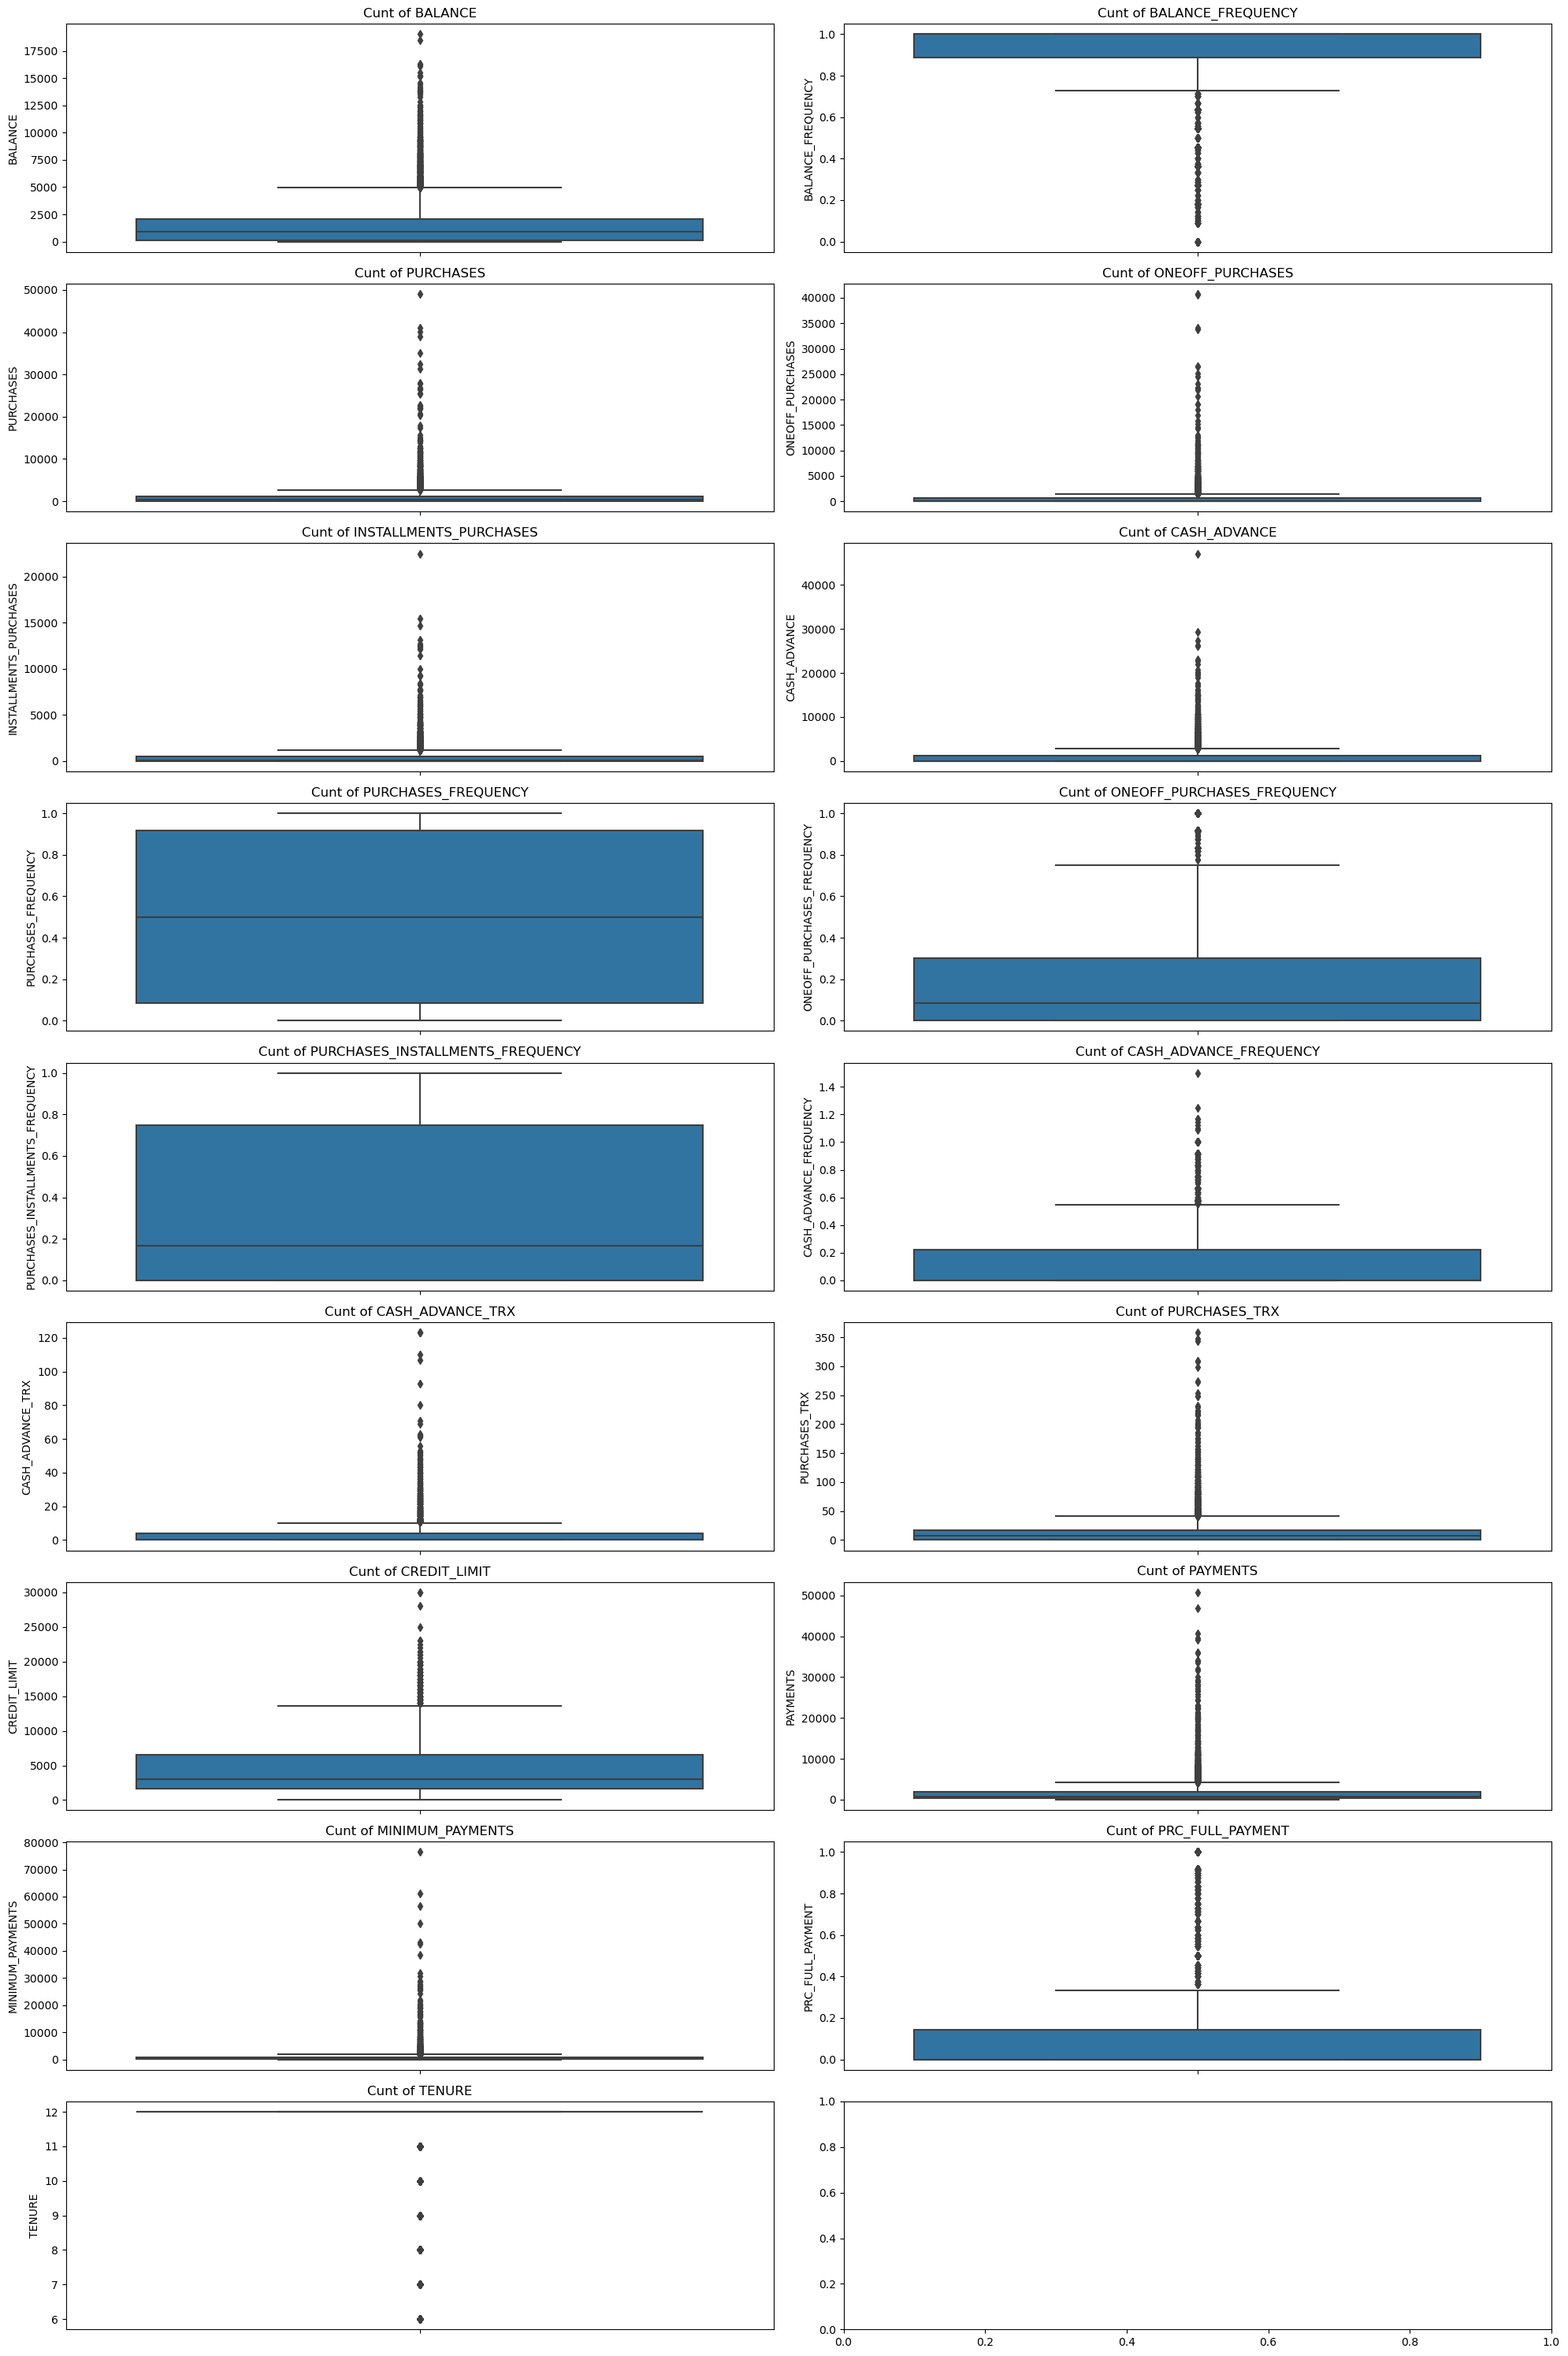

In [42]:
# Filtrar columnas numéricas
numeric_columns = data.select_dtypes(include=['number']).columns

# Crear boxplots para cada columna numérica en relación con FraudFound
fig, axs = plt.subplots(len(numeric_columns)//2 + 1, 2, figsize=(20, 30))

# Flatten the axes array para facilitar la iteración
axs = axs.flatten()

# Para cada columna numérica, generar un gráfico de caja (boxplot)
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=col, data=data, ax=axs[i])
    axs[i].set_title(f'Cunt of {col}')
    axs[i].set_ylabel(col)

# Ajustar los espacios para que los gráficos no se solapen
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Processing


In [44]:
data = data.drop(['PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES',"CUST_ID"], axis=1)
data

BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
0       40.900749           0.818182      95.40                   95.40   
1     3202.467416           0.909091       0.00                    0.00   
2     2495.148862           1.000000     773.17                    0.00   
3     1666.670542           0.636364    1499.00                    0.00   
4      817.714335           1.000000      16.00                    0.00   
...           ...                ...        ...                     ...   
8945    28.493517           1.000000     291.12                  291.12   
8946    19.183215           1.000000     300.00                  300.00   
8947    23.398673           0.833333     144.40                  144.40   
8948    13.457564           0.833333       0.00                    0.00   
8949   372.708075           0.666667    1093.25                    0.00   

      CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0         0.000000             0.166667                    0.000000   
1      6442.945483             0.000000                    0.000000   
2         0.000000             1.000000                    1.000000   
3       205.788017             0.083333                    0.083333   
4         0.000000             0.083333                    0.083333   
...            ...                  ...                         ...   
8945      0.000000             1.000000                    0.000000   
8946      0.000000             1.000000                    0.000000   
8947      0.000000             0.833333                    0.000000   
8948     36.558778             0.000000                    0.000000   
8949    127.040008             0.666667                    0.666667   

      CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0                    0              2        1000.0   201.802084   
1                    4              0        7000.0  4103.032597   
2                    0             12        7500.0   622.066742   
3                    1              1        7500.0     0.000000   
4                    0              1        1200.0   678.334763   
...                ...            ...           ...          ...   
8945                 0              6        1000.0   325.594462   
8946                 0              6        1000.0   275.861322   
8947                 0              5        1000.0    81.270775   
8948                 2              0         500.0    52.549959   
8949                 2             23        1200.0    63.165404   

      MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0           139.509787          0.000000      12  
1          1072.340217          0.222222      12  
2           627.284787          0.000000      12  
3                  NaN          0.000000      12  
4           244.791237          0.000000      12  
...                ...               ...     ...  
8945         48.886365          0.500000       6  
8946               NaN          0.000000       6  
8947         82.418369          0.250000       6  
8948         55.755628          0.250000       6  
8949         88.288956          0.000000       6  

[8950 rows x 14 columns]

## Data Cleaning


In [45]:
# Imputar el valor nulo de CREDIT_LIMIT con la mediana
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)
# Imputar valores nulos de MINIMUM_PAYMENTS con la mediana
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

## Feature Engineering
Cree al menos 2 variables nuevas


In [46]:
# Calcular el ratio de pago mínimo, manejando divisiones por cero
data['Minimum_Payment_Ratio'] = np.where(
    data['PAYMENTS'] == 0,
    0,  # Si el total de pagos es cero, asumimos el ratio como 0
    data['MINIMUM_PAYMENTS'] / data['PAYMENTS']
)
# Calcular el ratio de utilización de crédito, manejando divisiones por cero
data['Credit_Utilization_Ratio'] = np.where(
    data['CREDIT_LIMIT'] == 0,
    0,  # Si el límite de crédito es cero, asumimos el ratio como 0
    data['BALANCE'] / data['CREDIT_LIMIT']
)
data

BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
0       40.900749           0.818182      95.40                   95.40   
1     3202.467416           0.909091       0.00                    0.00   
2     2495.148862           1.000000     773.17                    0.00   
3     1666.670542           0.636364    1499.00                    0.00   
4      817.714335           1.000000      16.00                    0.00   
...           ...                ...        ...                     ...   
8945    28.493517           1.000000     291.12                  291.12   
8946    19.183215           1.000000     300.00                  300.00   
8947    23.398673           0.833333     144.40                  144.40   
8948    13.457564           0.833333       0.00                    0.00   
8949   372.708075           0.666667    1093.25                    0.00   

      CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0         0.000000             0.166667                    0.000000   
1      6442.945483             0.000000                    0.000000   
2         0.000000             1.000000                    1.000000   
3       205.788017             0.083333                    0.083333   
4         0.000000             0.083333                    0.083333   
...            ...                  ...                         ...   
8945      0.000000             1.000000                    0.000000   
8946      0.000000             1.000000                    0.000000   
8947      0.000000             0.833333                    0.000000   
8948     36.558778             0.000000                    0.000000   
8949    127.040008             0.666667                    0.666667   

      CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0                    0              2        1000.0   201.802084   
1                    4              0        7000.0  4103.032597   
2                    0             12        7500.0   622.066742   
3                    1              1        7500.0     0.000000   
4                    0              1        1200.0   678.334763   
...                ...            ...           ...          ...   
8945                 0              6        1000.0   325.594462   
8946                 0              6        1000.0   275.861322   
8947                 0              5        1000.0    81.270775   
8948                 2              0         500.0    52.549959   
8949                 2             23        1200.0    63.165404   

      MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Minimum_Payment_Ratio  \
0           139.509787          0.000000      12               0.691320   
1          1072.340217          0.222222      12               0.261353   
2           627.284787          0.000000      12               1.008388   
3           312.343947          0.000000      12               0.000000   
4           244.791237          0.000000      12               0.360871   
...                ...               ...     ...                    ...   
8945         48.886365          0.500000       6               0.150145   
8946        312.343947          0.000000       6               1.132250   
8947         82.418369          0.250000       6               1.014121   
8948         55.755628          0.250000       6               1.061002   
8949         88.288956          0.000000       6               1.397742   

      Credit_Utilization_Ratio  
0                     0.040901  
1                     0.457495  
2                     0.332687  
3                     0.222223  
4                     0.681429  
...                        ...  
8945                  0.028494  
8946                  0.019183  
8947                  0.023399  
8948                  0.026915  
8949                  0.310590  

[8950 rows x 16 columns]

## Encoding


## Scaling (if needed)


In [47]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
dta_scaled = pd.DataFrame(data_scaled, columns=data.columns)
dta_scaled

BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
0    -0.731989          -0.249434  -0.424900               -0.349079   
1     0.786961           0.134325  -0.469552               -0.454576   
2     0.447135           0.518084  -0.107668               -0.454576   
3     0.049099          -1.016953   0.232058               -0.454576   
4    -0.358775           0.518084  -0.462063               -0.454576   
...        ...                ...        ...                     ...   
8945 -0.737950           0.518084  -0.333293               -0.132643   
8946 -0.742423           0.518084  -0.329136               -0.122823   
8947 -0.740398          -0.185477  -0.401965               -0.294893   
8948 -0.745174          -0.185477  -0.469552               -0.454576   
8949 -0.572575          -0.889033   0.042146               -0.454576   

      CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0        -0.466786            -0.806490                   -0.678661   
1         2.605605            -1.221758                   -0.678661   
2        -0.466786             1.269843                    2.673451   
3        -0.368653            -1.014125                   -0.399319   
4        -0.466786            -1.014125                   -0.399319   
...            ...                  ...                         ...   
8945     -0.466786             1.269843                   -0.678661   
8946     -0.466786             1.269843                   -0.678661   
8947     -0.466786             0.854576                   -0.678661   
8948     -0.449352            -1.221758                   -0.678661   
8949     -0.406205             0.439310                    1.556082   

      CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0            -0.476070      -0.511333     -0.960378 -0.528979   
1             0.110074      -0.591796      0.688678  0.818642   
2            -0.476070      -0.109020      0.826100 -0.383805   
3            -0.329534      -0.551565      0.826100 -0.598688   
4            -0.476070      -0.551565     -0.905410 -0.364368   
...                ...            ...           ...       ...   
8945         -0.476070      -0.350408     -0.960378 -0.486217   
8946         -0.476070      -0.350408     -0.960378 -0.503396   
8947         -0.476070      -0.390639     -0.960378 -0.570615   
8948         -0.182998      -0.591796     -1.097800 -0.580536   
8949         -0.182998       0.333524     -0.905410 -0.576869   

      MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  Minimum_Payment_Ratio  \
0            -0.302400         -0.525551  0.360680              -0.052575   
1             0.097500          0.234227  0.360680              -0.075753   
2            -0.093293         -0.525551  0.360680              -0.035484   
3            -0.228307         -0.525551  0.360680              -0.089841   
4            -0.257266         -0.525551  0.360680              -0.070388   
...                ...               ...       ...                    ...   
8945         -0.341250          1.183951 -4.122768              -0.081748   
8946         -0.228307         -0.525551 -4.122768              -0.028807   
8947         -0.326875          0.329200 -4.122768              -0.035175   
8948         -0.338305          0.329200 -4.122768              -0.032648   
8949         -0.324358         -0.525551 -4.122768              -0.014495   

      Credit_Utilization_Ratio  
0                    -0.892951  
1                     0.176063  
2                    -0.144206  
3                    -0.427665  
4                     0.750693  
...                        ...  
8945                 -0.924789  
8946                 -0.948680  
8947                 -0.937863  
8948                 -0.928839  
8949                 -0.200907  

[8950 rows x 16 columns]

## # Train model/Tune hyperparameters 

Explique el criterio utilizado

C:\Users\micha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\clust

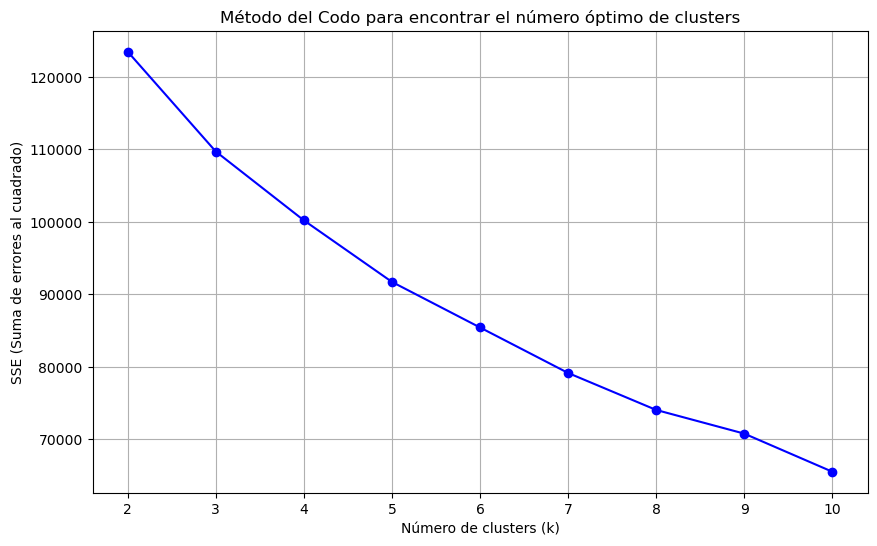

C:\Users\micha\AppData\Local\Temp\ipykernel_17676\2098544830.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(K, silhouette_scores, 'bx-', marker='o')


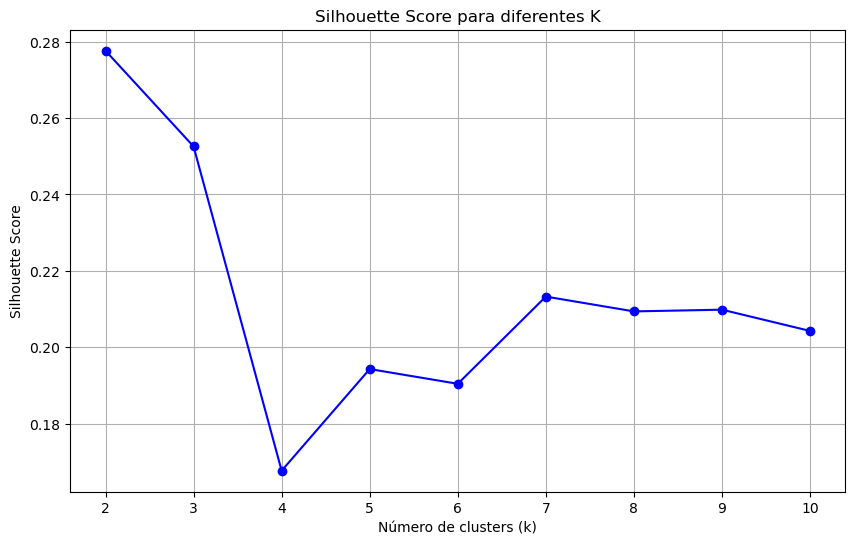

C:\Users\micha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


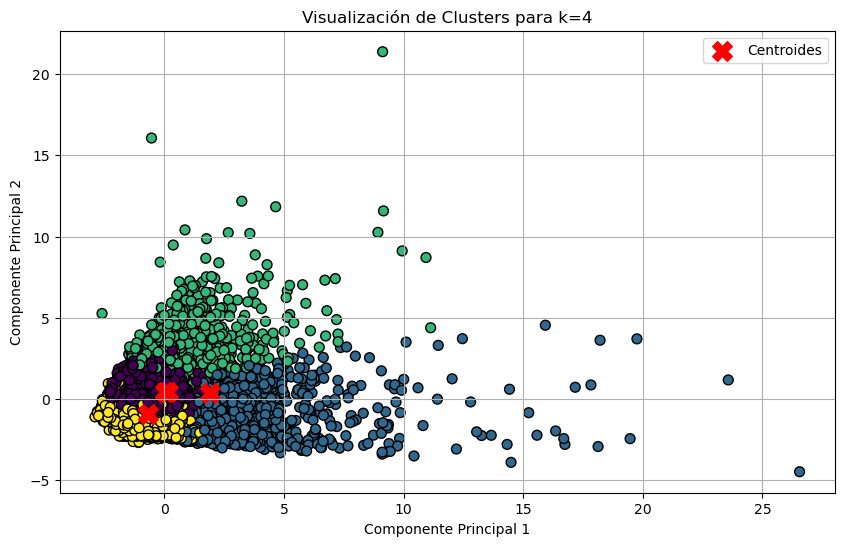

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Método del Codo y Silhouette Score
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Gráfico del método del Codo
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bx-', marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE (Suma de errores al cuadrado)')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.grid(True)
plt.show()

# Gráfico del Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-', marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes K')
plt.grid(True)
plt.show()

# Elegimos el número óptimo de clusters (puedes ajustar manualmente)
optimal_k = 4  # Cambia este valor basado en el gráfico del método del codo o el silhouette score

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

# Reducción de dimensionalidad para visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Visualización de los clusters en 2D
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'Visualización de Clusters para k={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()


In [78]:
# Supón que el DataFrame original sin escalar es 'data'
column_names = data.columns  # Obtiene los nombres de las columnas originales

# Crea un DataFrame con los datos escalados y añade las etiquetas de cluster
data_with_clusters = pd.DataFrame(data_scaled, columns=column_names)
data_with_clusters['Cluster'] = cluster_labels


In [79]:
# Diccionario para almacenar cada cluster
clusters = {}
for i in range(optimal_k):
    clusters[f'Cluster_{i}'] = data_with_clusters[data_with_clusters['Cluster'] == i]


In [80]:
for i in range(optimal_k):
    print(f"Cluster {i}:")
    print(clusters[f'Cluster_{i}'].head())  # Muestra los primeros registros de cada cluster
    print("\n")


Cluster 0:
     BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
4  -0.358775           0.518084  -0.462063               -0.454576   
5   0.117878           0.518084   0.154492                1.019822   
7   0.124520           0.518084  -0.265388                0.027792   
8  -0.264026           0.518084  -0.066330               -0.233408   
10 -0.130368           0.518084  -0.038888                0.562932   

    CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
4      -0.466786            -1.014125                   -0.399319   
5      -0.466786             0.439310                   -0.678661   
7      -0.466786             1.269843                   -0.678661   
8      -0.466786            -0.391225                   -0.399319   
10     -0.466786             1.269843                   -0.678661   

    CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
4           -0.47607      -0.551565     -0.905410 -0.364368         -0.2

In [81]:
for i in range(optimal_k):
    print(f"Promedios del Cluster {i}:")
    print(clusters[f'Cluster_{i}'][['BALANCE', 'PURCHASES', 'CASH_ADVANCE']].mean())
    print("\n")

Promedios del Cluster 0:
BALANCE         0.019031
PURCHASES      -0.292024
CASH_ADVANCE   -0.083884
dtype: float64


Promedios del Cluster 1:
BALANCE         0.165344
PURCHASES       1.270840
CASH_ADVANCE   -0.287539
dtype: float64


Promedios del Cluster 2:
BALANCE         1.888561
PURCHASES      -0.160609
CASH_ADVANCE    2.053935
dtype: float64


Promedios del Cluster 3:
BALANCE        -0.685926
PURCHASES      -0.215087
CASH_ADVANCE   -0.368148
dtype: float64




Mejores Parámetros: {'eps': 0.1, 'min_samples': 10}
Mejor Silhouette Score: -0.2012


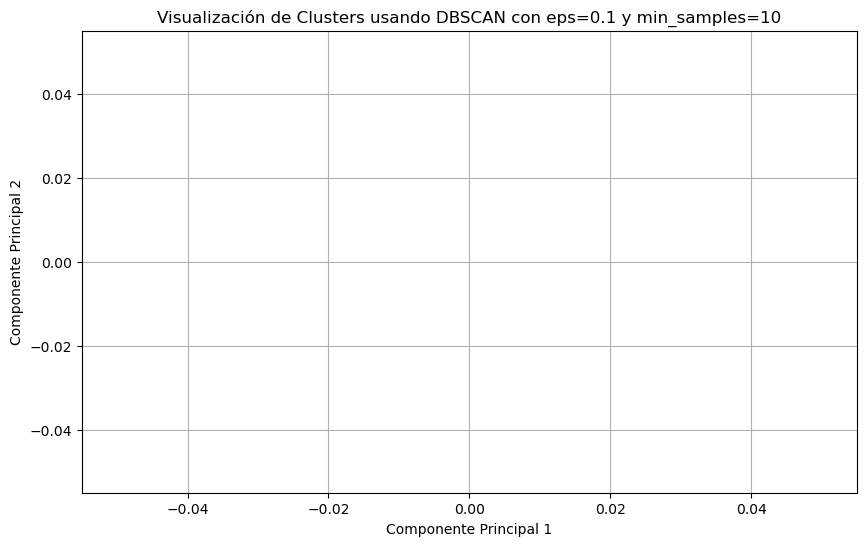

In [55]:
# Ejemplo DBSCAN

param_grid = {
    'eps': [0.1, 0.2, 0.3, 0.5, 0.7],  # Distancia de radio
    'min_samples': [3, 5, 10]  # Número mínimo de puntos para formar un cluster
}

# Variable para almacenar los mejores resultados
best_score = -1
best_params = {}

# Búsqueda manual (Grid Search)
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        # Definir el modelo con los parámetros actuales
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Ajustar el modelo
        labels = dbscan.fit_predict(data_scaled)

        # Verificar que haya clusters generados, ya que DBSCAN puede generar ruido (label -1)
        if len(set(labels)) > 1:  # Necesitamos al menos 2 clusters para calcular el Silhouette Score
            # Evaluar el modelo con Silhouette Score
            score = silhouette_score(data_scaled, labels)

            # Guardar si es el mejor score
            if score > best_score:
                best_score = score
                best_params = {
                    'eps': eps,
                    'min_samples': min_samples
                }

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores Parámetros: {best_params}")
print(f"Mejor Silhouette Score: {best_score:.4f}")


plt.figure(figsize=(10, 6))
unique_labels = set(best_params)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0.5, 0.5, 0.5, 1]  # Color para el ruido
    class_member_mask = (best_params == k)
    xy = data_pca[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6 if k == -1 else 10)


plt.title(f'Visualización de Clusters usando DBSCAN con eps={best_params["eps"]} y min_samples={best_params["min_samples"]}')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


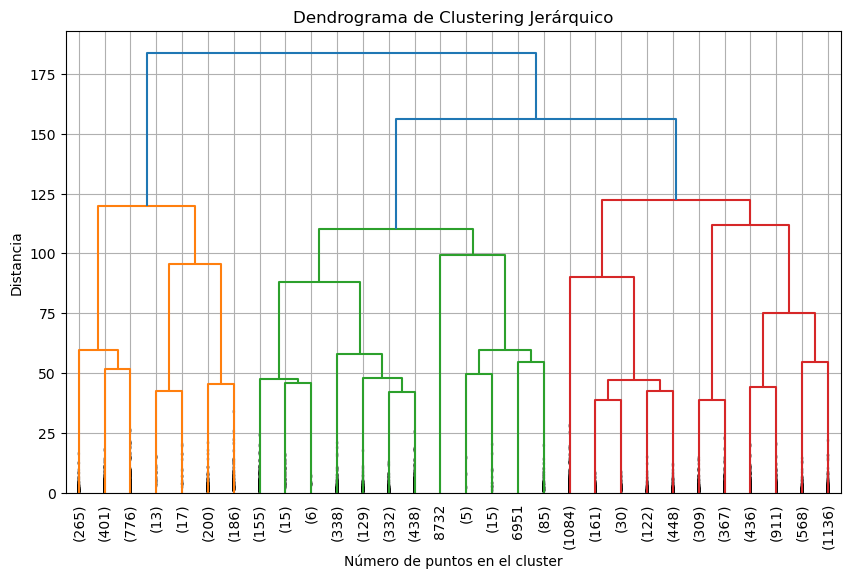

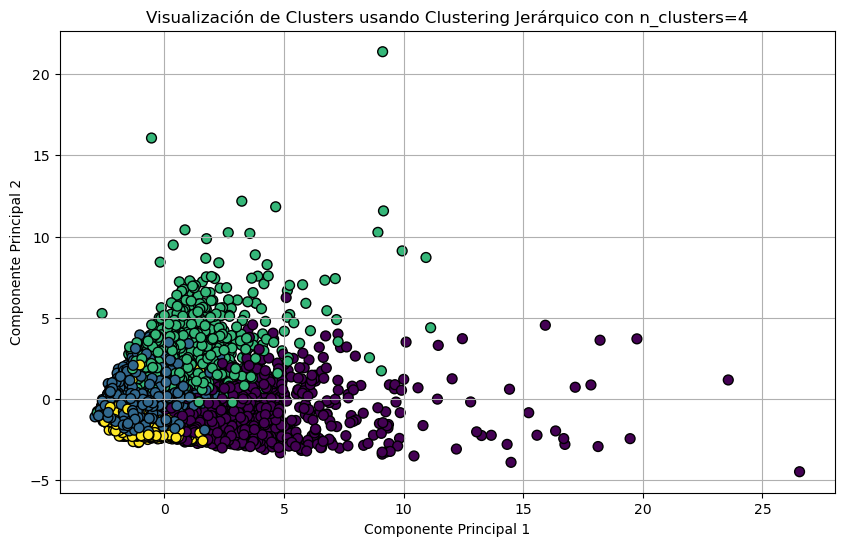

In [56]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 1. Visualizar el dendrograma
plt.figure(figsize=(10, 6))

# Calcular la matriz de enlaces (usamos el método 'ward' que minimiza la varianza)
Z = linkage(data_scaled, method='ward')

# Crear y visualizar el dendrograma
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Número de puntos en el cluster')
plt.ylabel('Distancia')
plt.grid(True)
plt.show()

# 2. Ajustar el modelo de Clustering Jerárquico
# Elegir el número de clusters (por ejemplo, 4 basado en el dendrograma)
n_clusters = 4
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(data_scaled)

# 3. Visualización de los clusters en 2D usando PCA
from sklearn.decomposition import PCA

# Reducción de dimensionalidad para visualizar en 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Gráfico de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title(f'Visualización de Clusters usando Clustering Jerárquico con n_clusters={n_clusters}')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


# Visualization of clusters

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BALANCE                     8950 non-null   float64
 1   BALANCE_FREQUENCY           8950 non-null   float64
 2   PURCHASES                   8950 non-null   float64
 3   INSTALLMENTS_PURCHASES      8950 non-null   float64
 4   CASH_ADVANCE                8950 non-null   float64
 5   PURCHASES_FREQUENCY         8950 non-null   float64
 6   ONEOFF_PURCHASES_FREQUENCY  8950 non-null   float64
 7   CASH_ADVANCE_TRX            8950 non-null   int64  
 8   PURCHASES_TRX               8950 non-null   int64  
 9   CREDIT_LIMIT                8950 non-null   float64
 10  PAYMENTS                    8950 non-null   float64
 11  MINIMUM_PAYMENTS            8950 non-null   float64
 12  PRC_FULL_PAYMENT            8950 non-null   float64
 13  TENURE                      8950 

In [ ]:
# Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['PURCHASES', 'CASH_ADVANCE', 'INSTALLMENTS_PURCHASES',"PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY"]
for i in range(len(cols)):
    sns.boxplot(data=df, x='CLUSTER', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()

# Interpretation of clusters

In [ ]:
EJEMPLO

1. Cluster 0. Clientes con ingreso anual intermedio y score de gasto anual intermedio
2. Cluster 1. Clientes con bajo ingreso anual y alto score de gasto anual
3. Cluster 2. Clientes con alto ingreso anual y alto score de gasto anual
4. Cluster 3. Clientes con alto ingreso anual y bajo score de gasto anual